In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [6]:


df = pd.read_excel('/content/Data (1).xlsx')
df.head()


,Date_Time,IP_Address,Vendor_Name,Type
0,"July 8th 2019, 14:43:03.000",10.1.1.285,Vendor-1,INVOICE
1,"July 8th 2019, 14:43:01.000",10.1.2.389,Vendor-1,INVOICE
2,"July 8th 2019, 14:42:59.000",10.1.1.415,Vendor-1,PRE_APPROVAL
3,"July 8th 2019, 14:42:57.000",10.1.1.79,Vendor-1,PRE_APPROVAL
4,"July 8th 2019, 14:42:55.000",10.1.1.60,Vendor-10,IPC


In [7]:
!pip install dabl
import dabl

In [8]:
df_clean=dabl.clean(df,verbose=1)
types=dabl.detect_types(df_clean)
types

Detected feature types:
0 float, 0 int, 4 object, 0 date, 0 other
Interpreted as:
continuous      0
dirty_float     0
low_card_int    0
categorical     3
date            0
free_string     1
useless         0
dtype: int64


,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Date_Time,False,False,False,False,False,True,False
IP_Address,False,False,False,True,False,False,False
Vendor_Name,False,False,False,True,False,False,False
Type,False,False,False,True,False,False,False


In [9]:
df.isnull().sum()

Date_Time         0
IP_Address       29
Vendor_Name       3
Type           4808
dtype: int64

In [10]:
!pip install missingno
import missingno as msno


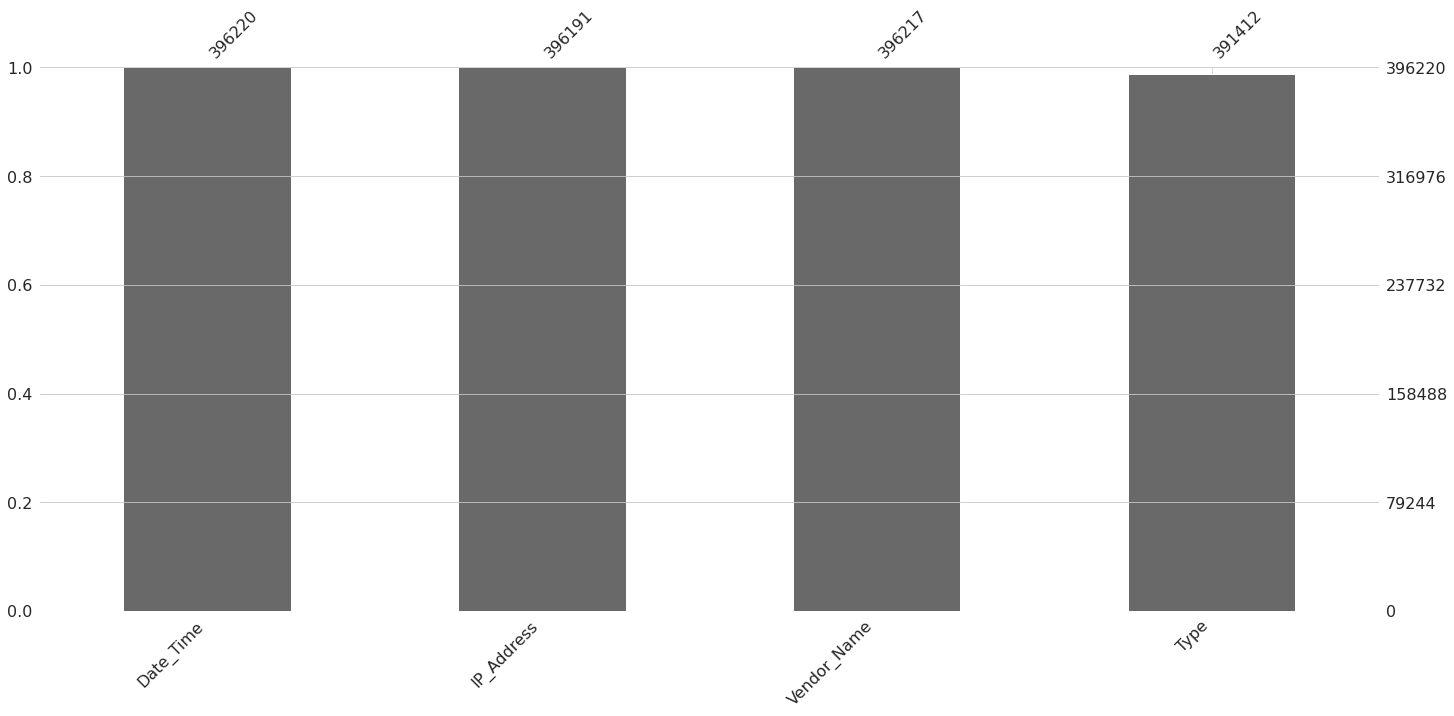

In [11]:
msno.bar(df)

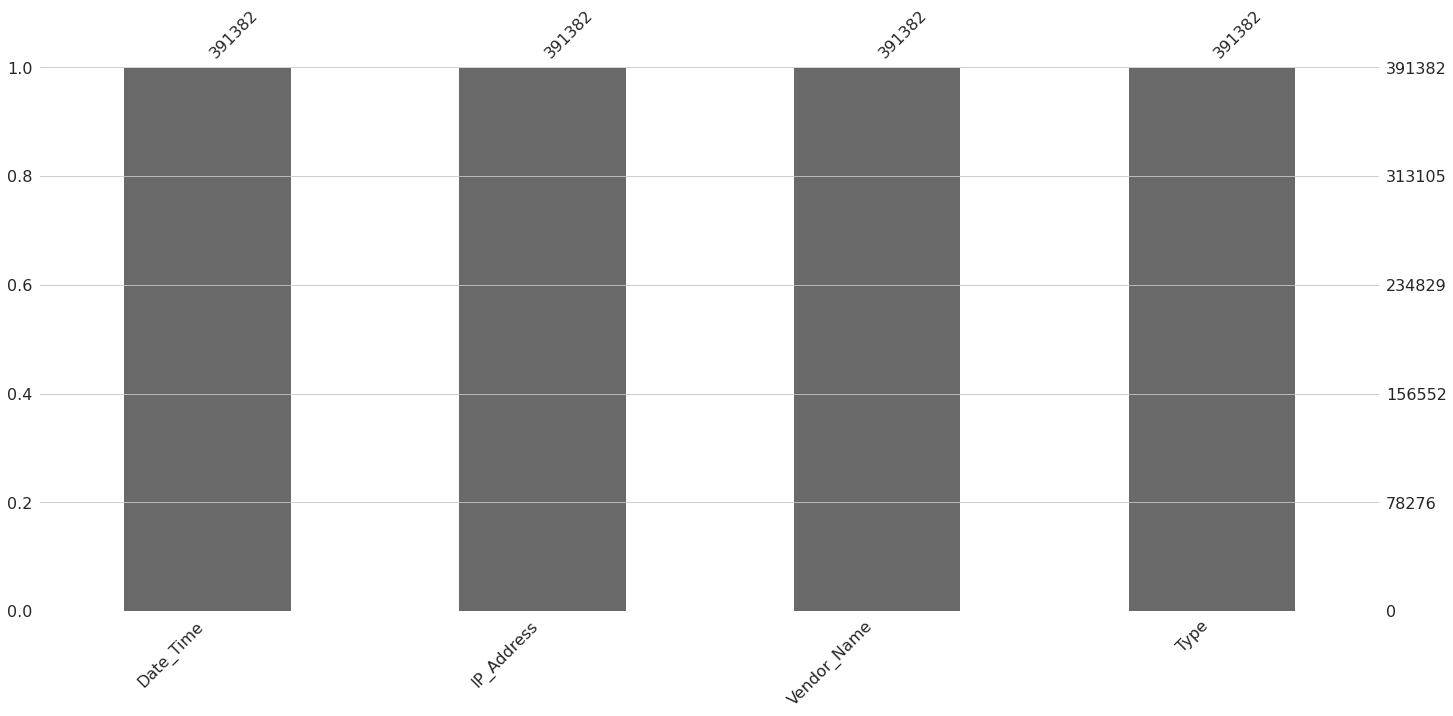

In [12]:
df1 = df.dropna(how='any',axis=0) 
msno.bar(df1)


In [16]:
print(df1.head(2))
print(df1.shape)

                     Date_Time  IP_Address Vendor_Name     Type
0  July 8th 2019, 14:43:03.000  10.1.1.285    Vendor-1  INVOICE
1  July 8th 2019, 14:43:01.000  10.1.2.389    Vendor-1  INVOICE
(391382, 4)


In [14]:
df2=df1.drop_duplicates(keep=False)
df2.shape

(391350, 4)

In [0]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = df2[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('-'*40)
        print(series.value_counts())

        print('*'*80)

    sns.countplot(x=x, y=y, hue=hue, data=df2, palette=palette)
    #plt.show()

In [20]:
 categorical_summarized(df2, x='Vendor_Name', y=None, hue=None, palette='Set1', verbose=True)
 categorical_summarized(df2, x='IP_Address', y=None, hue=None, palette='Set1', verbose=True)
 categorical_summarized(df2, x='Date_Time', y=None, hue=None, palette='Set1', verbose=True)
 categorical_summarized(df2, x='Type', y=None, hue=None, palette='Set1', verbose=True)
 
 #Date_Time	IP_Address	Vendor_Name	

count         391350
unique           619
top       Vendor-775
freq           25894
Name: Vendor_Name, dtype: object
mode:  0    Vendor-775
dtype: object
----------------------------------------
Vendor-775    25894
Vendor-239    20880
Vendor-143    12042
Vendor-130    10036
Vendor-103     9472
              ...  
Vendor-384       10
Vendor-512       10
Vendor-411       10
Vendor-408       10
Vendor-322       10
Name: Vendor_Name, Length: 619, dtype: int64
********************************************************************************
count        391350
unique          386
top       10.1.1.63
freq           2413
Name: IP_Address, dtype: object
mode:  0    10.1.1.63
1    10.1.2.86
dtype: object
----------------------------------------
10.1.1.63     2413
10.1.2.86     2413
10.1.1.486    2385
10.1.1.86     2371
10.1.2.249    2362
              ... 
10.1.2.186     726
10.1.2.171     723
10.1.1.12      721
10.1.2.349     719
10.1.2.1       706
Name: IP_Address, Length: 386, dtype: int64
**

In [32]:
df2.IP_Address.unique()

array(['10.1.1.285', '10.1.2.389', '10.1.1.415', '10.1.1.79', '10.1.1.60',
       '10.1.2.66', '10.1.2.25', '10.1.2.247', '10.1.2.128', '10.1.1.243',
       '10.1.1.383', '10.1.2.279', '10.1.2.264', '10.1.2.468',
       '10.1.2.95', '10.1.2.47', '10.1.1.64', '10.1.2.412', '10.1.2.313',
       '10.1.2.1', '10.1.2.89', '10.1.1.170', '10.1.1.446', '10.1.1.63',
       '10.1.2.426', '10.1.1.382', '10.1.1.417', '10.1.2.177', '10.1.1.3',
       '10.1.2.54', '10.1.1.301', '10.1.1.71', '10.1.2.250', '10.1.2.316',
       '10.1.2.446', '10.1.2.86', '10.1.2.179', '10.1.2.12', '10.1.2.471',
       '10.1.2.160', '10.1.1.405', '10.1.1.36', '10.1.1.306',
       '10.1.1.100', '10.1.2.161', '10.1.2.376', '10.1.1.495',
       '10.1.2.343', '10.1.1.12', '10.1.1.83', '10.1.2.424', '10.1.2.371',
       '10.1.2.458', '10.1.2.273', '10.1.2.191', '10.1.2.100',
       '10.1.2.408', '10.1.1.471', '10.1.1.214', '10.1.1.90', '10.1.1.86',
       '10.1.1.367', '10.1.2.383', '10.1.2.497', '10.1.1.114',
       '10.1.2